## Importing libaries

In [3]:
import pandas as pd
# Visulization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading Data, removing unimportant columns and generating stats

In [4]:
maindata=pd.read_csv(r'employee-attrition.csv')
colsToDrop = ['EmployeeCount', 'StandardHours','EmployeeNumber']
maindata = maindata.drop(colsToDrop, axis=1)

In [5]:
# Generate summary statistics
maindata.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Check for missing values
print(maindata.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


## Exploring the data points

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('white')
sns.set(font_scale=1.5, rc={'font.family': 'Serif fonts'})

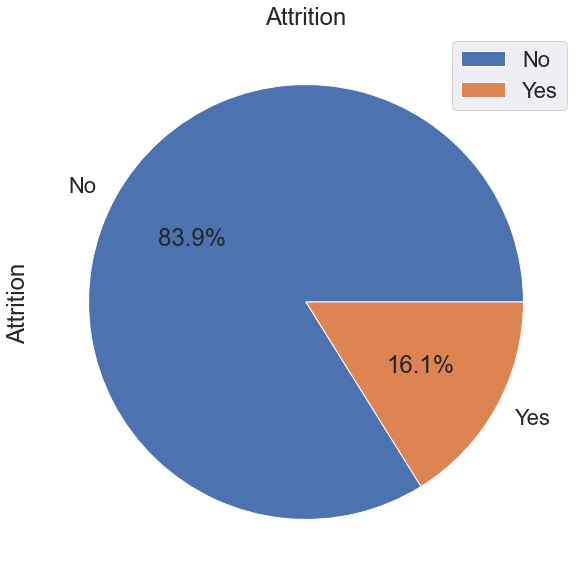

In [25]:
# Visualize the distribution of the target variable using a pie chart
plt.figure()
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('white')
sns.set(font_scale=2, rc={'font.family': 'Arial'})
maindata['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Attrition')
plt.legend()

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

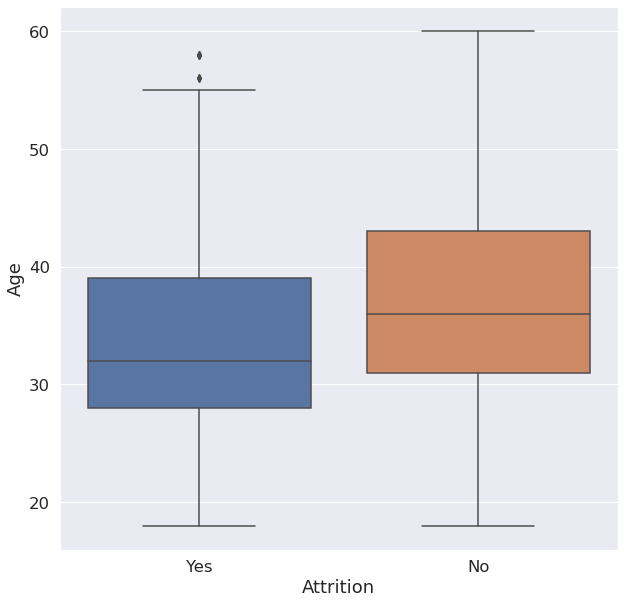

In [11]:
# Visualize relationship between numerical features and attrition
sns.boxplot(x="Attrition", y="Age", data=maindata)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

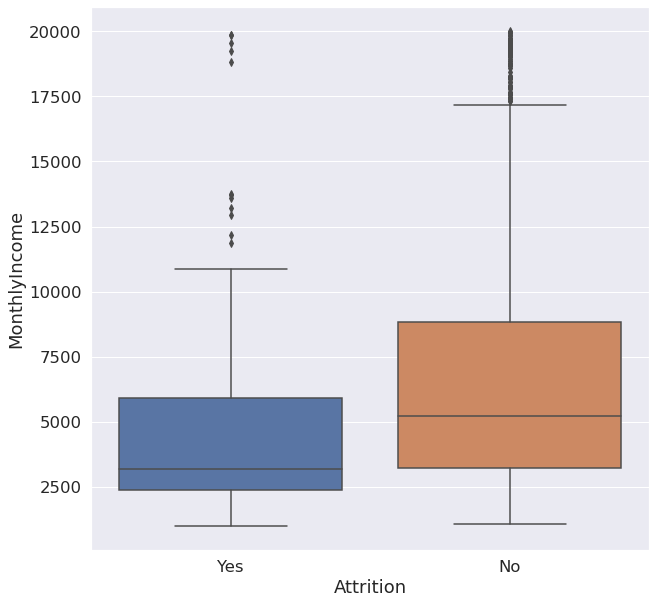

In [14]:
sns.boxplot(x="Attrition", y="MonthlyIncome", data=maindata)

### Restricting the analysis to only those employees who have left the company

In [21]:
dataForAttrition = maindata.loc[maindata['Attrition'] == 'Yes']

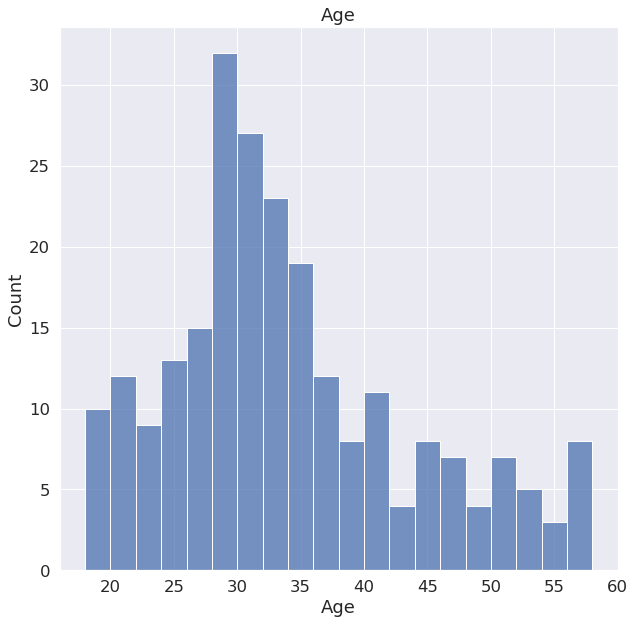

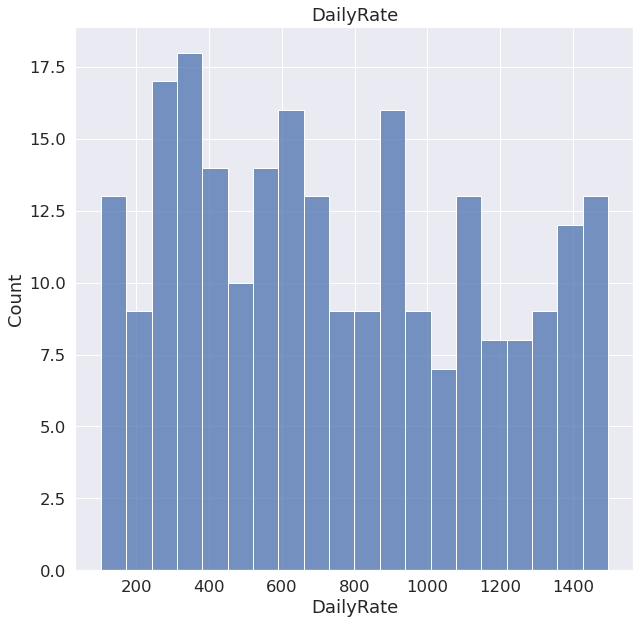

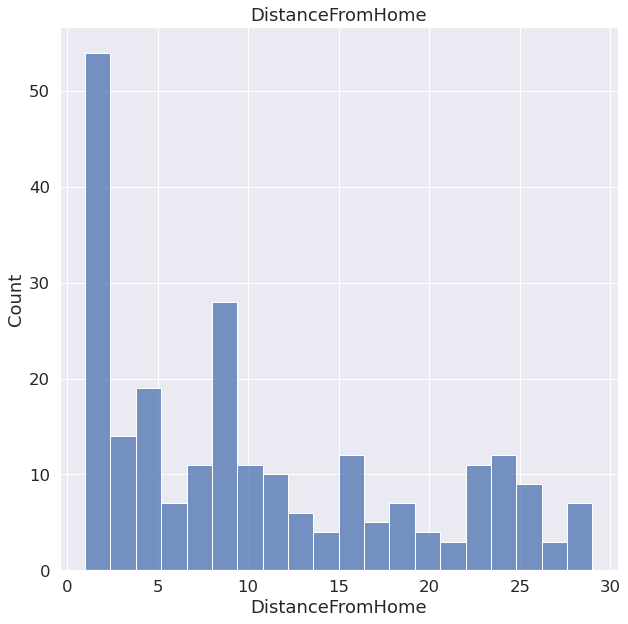

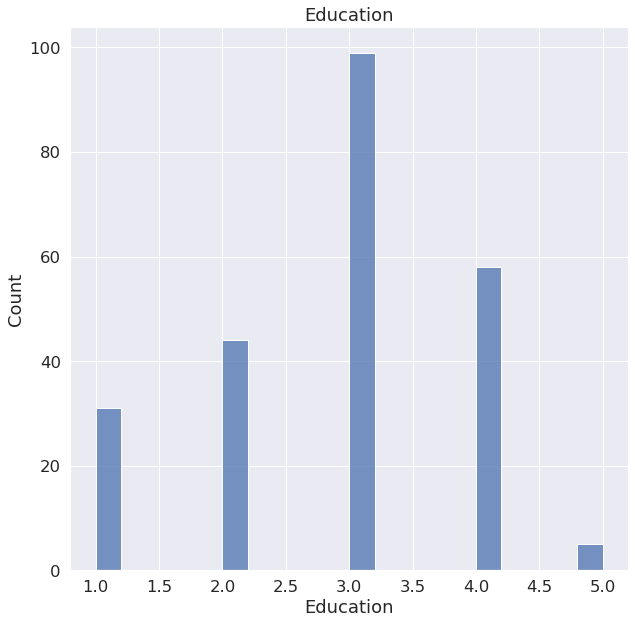

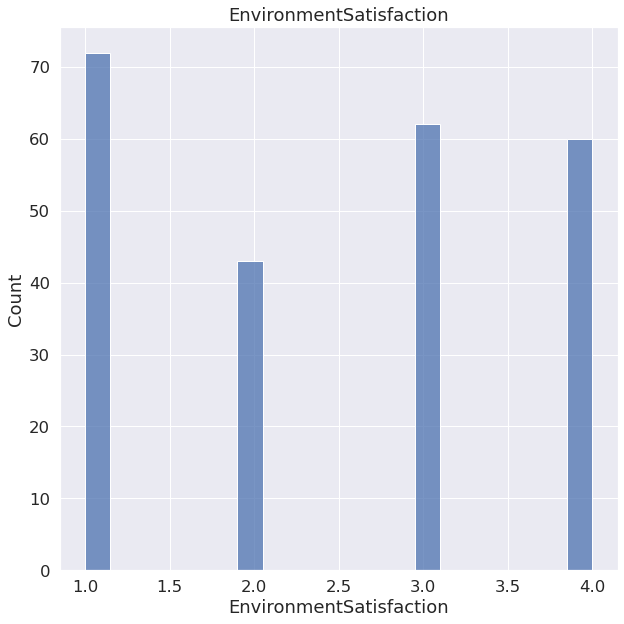

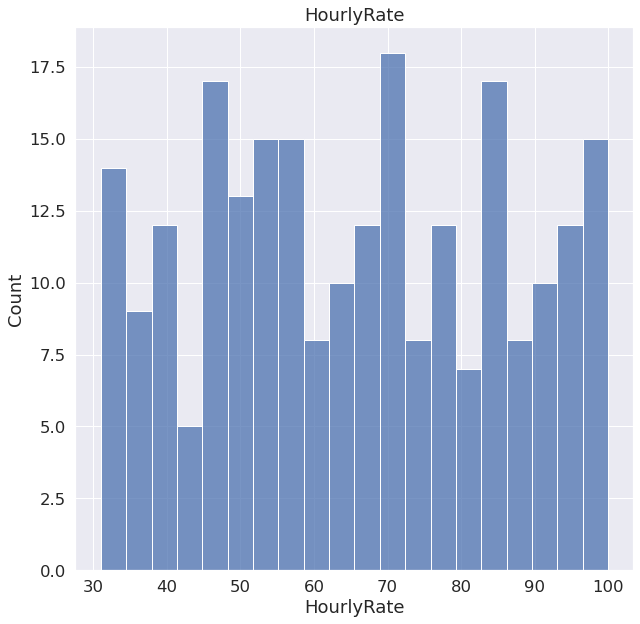

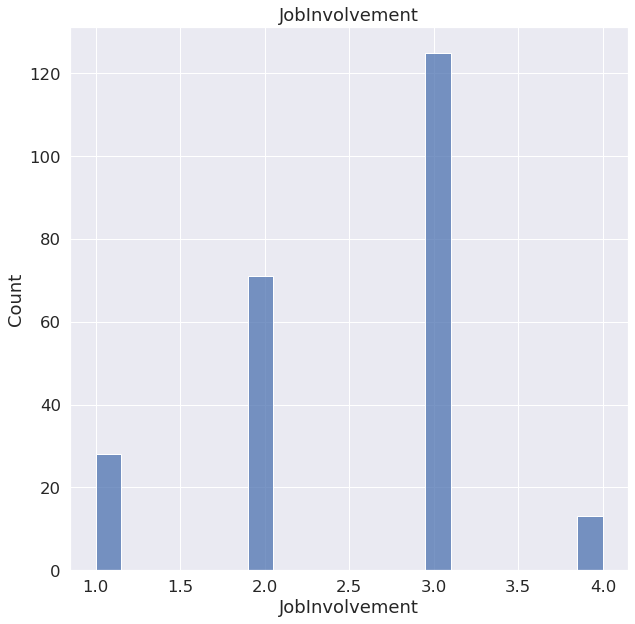

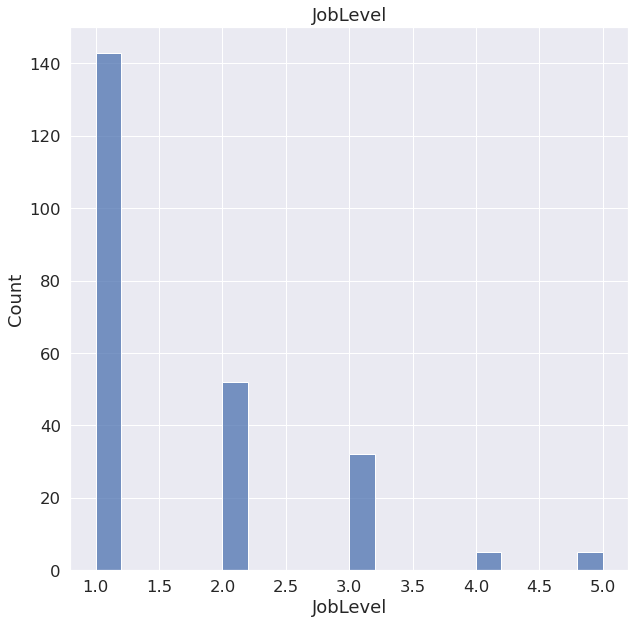

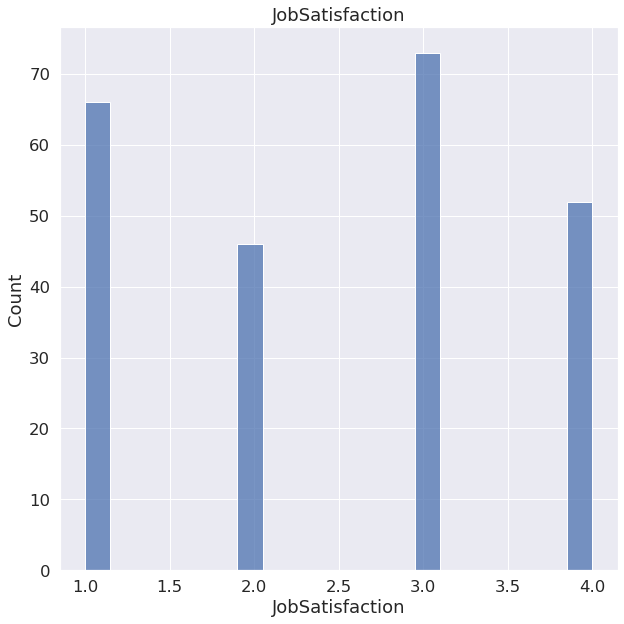

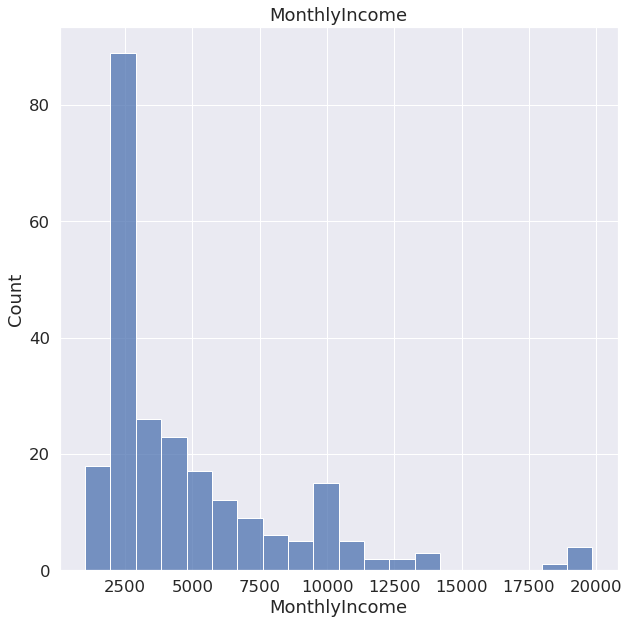

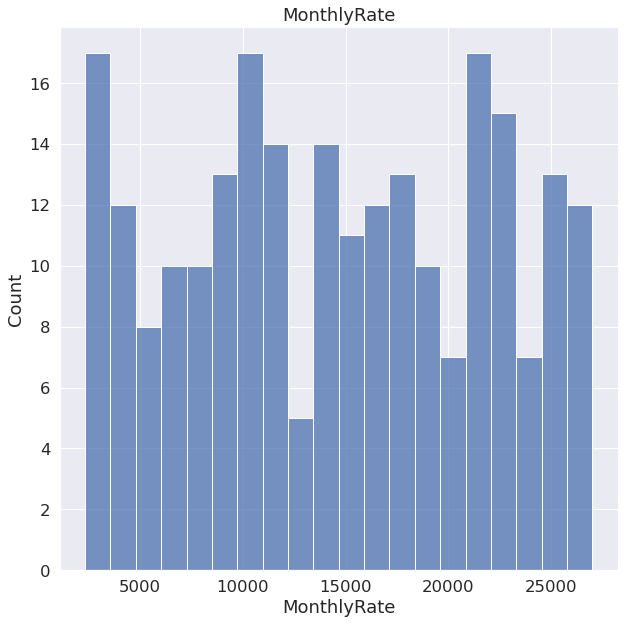

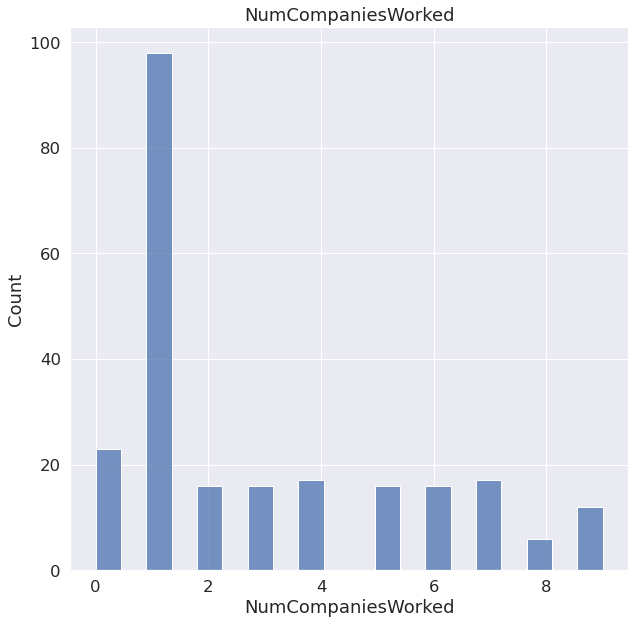

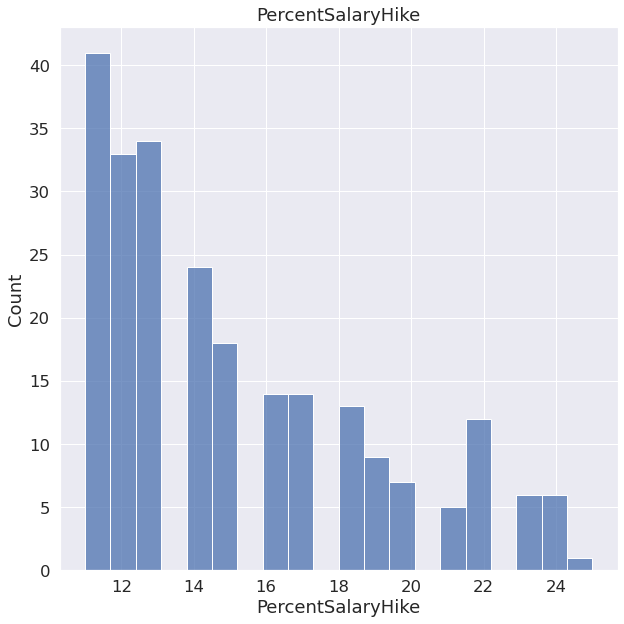

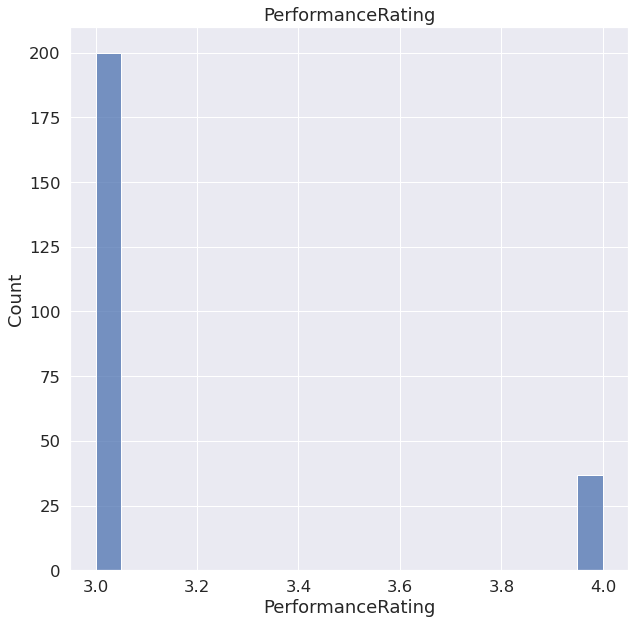

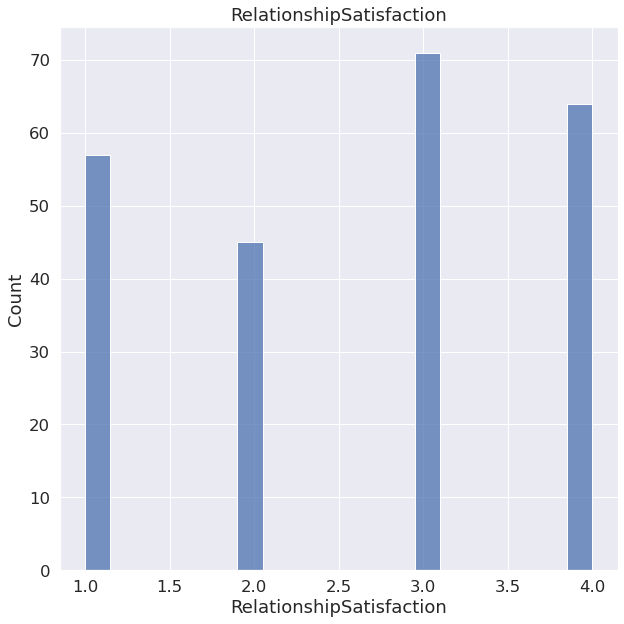

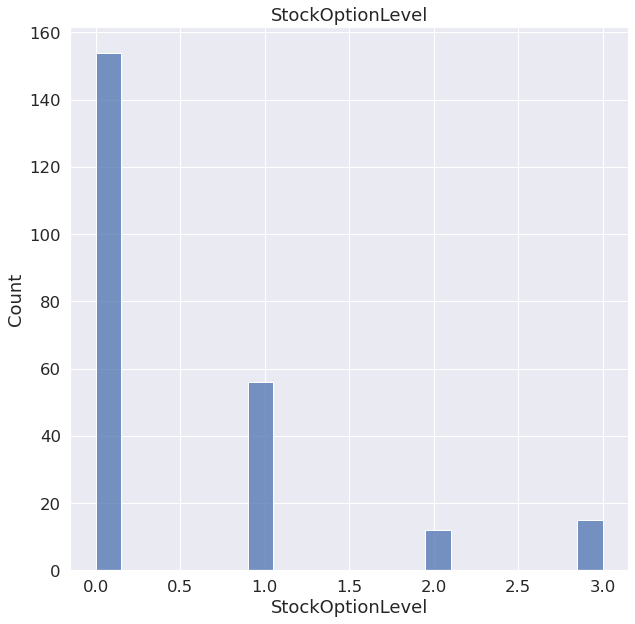

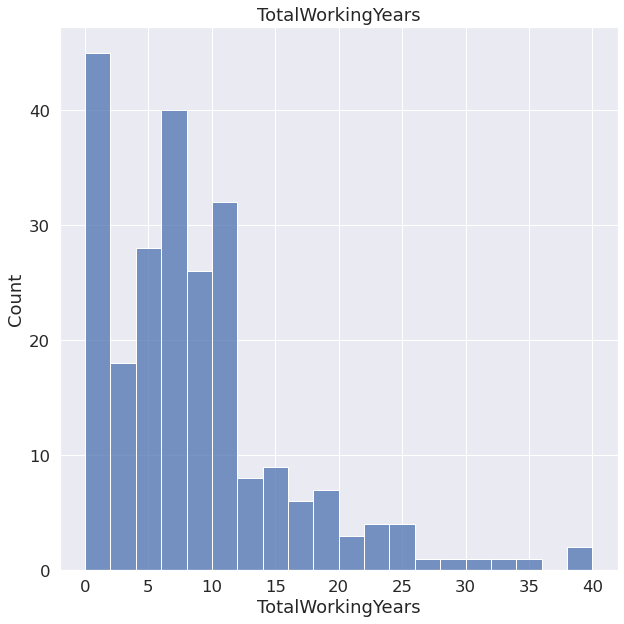

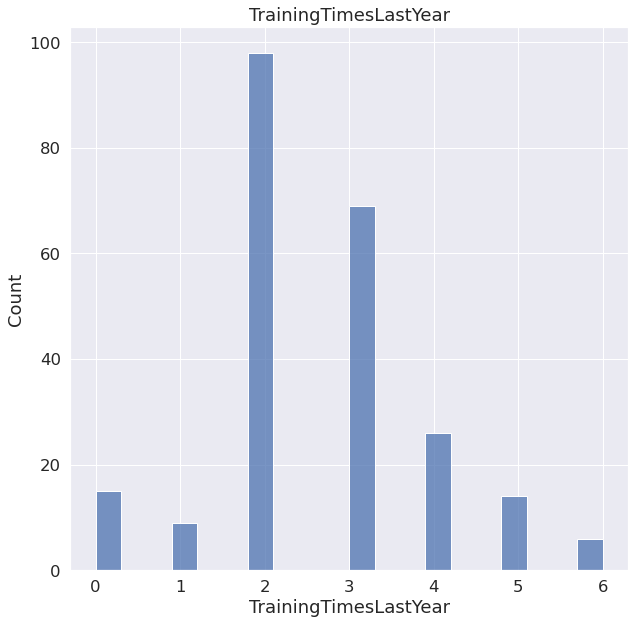

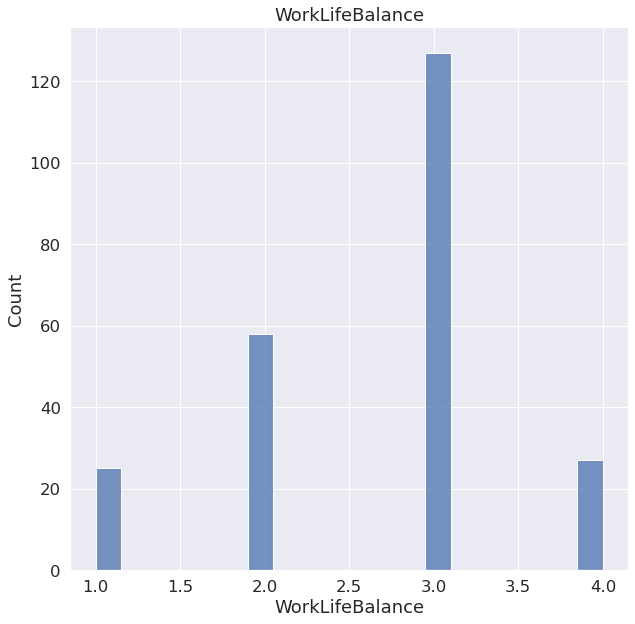

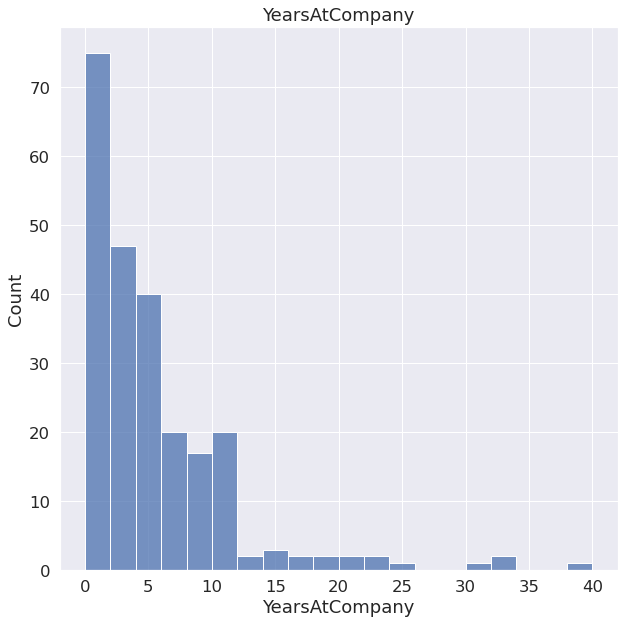

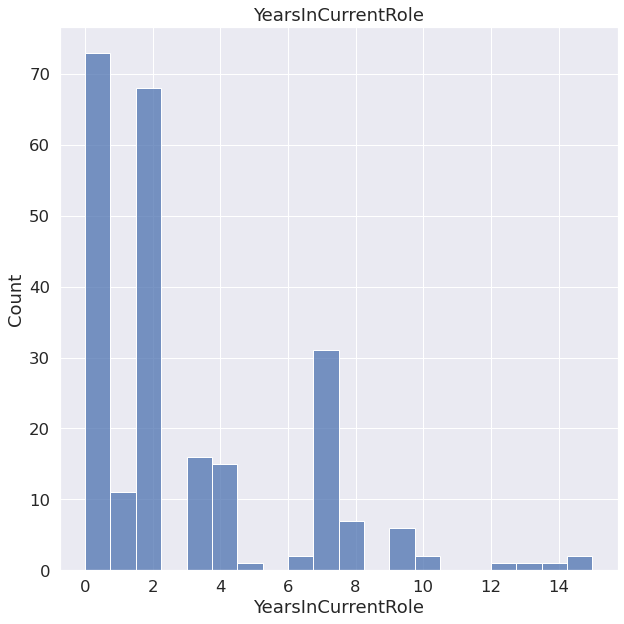

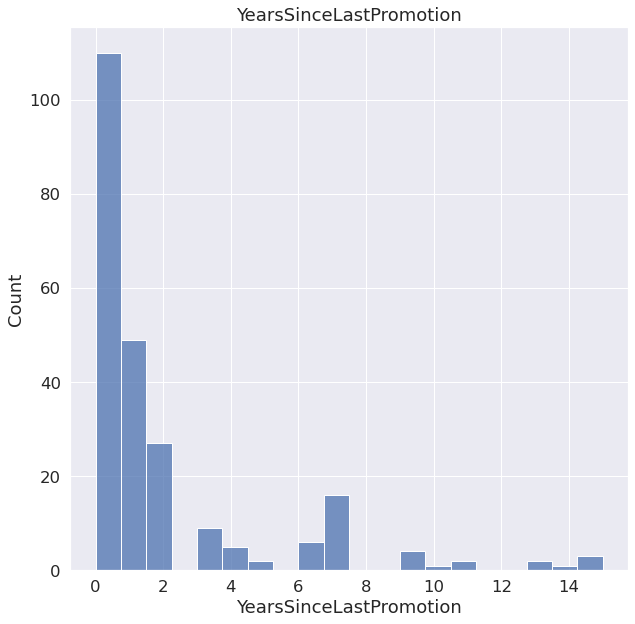

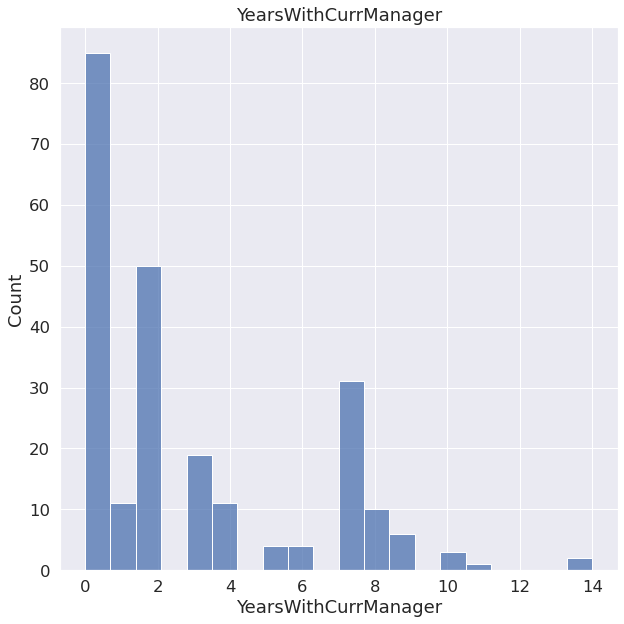

In [24]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('white')
sns.set(font_scale=1.5, rc={'font.family': 'Serif fonts'})

# Visualize the distribution of each numerical variable using histograms
for col in dataForAttrition.select_dtypes(include=['int64', 'float64']):
    plt.figure()
    sns.histplot(dataForAttrition[col], kde=False, bins=20)
    plt.title(col)

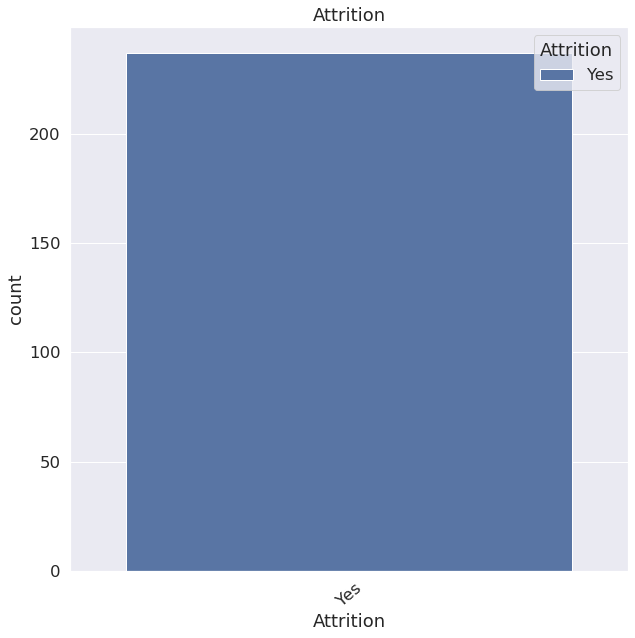

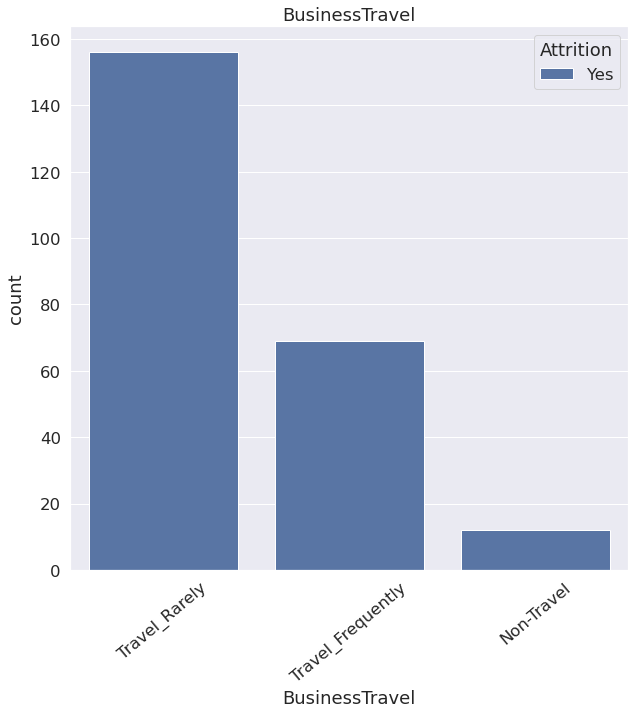

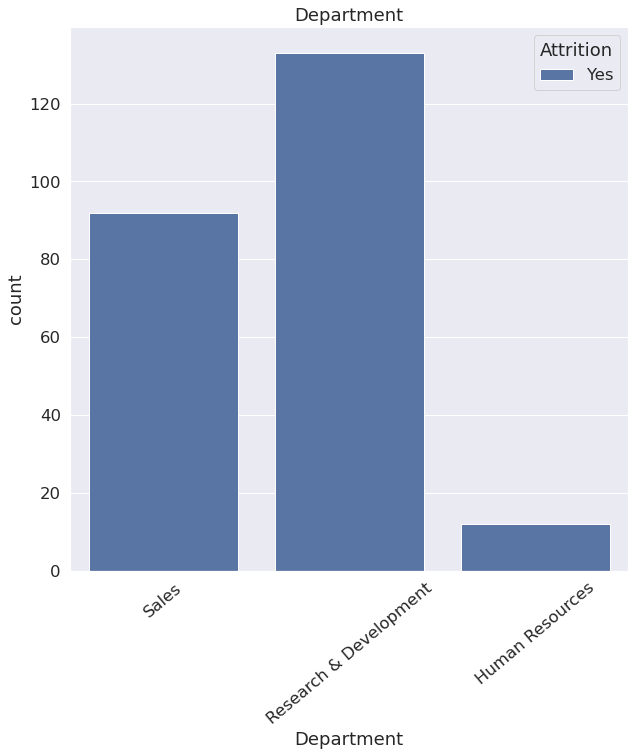

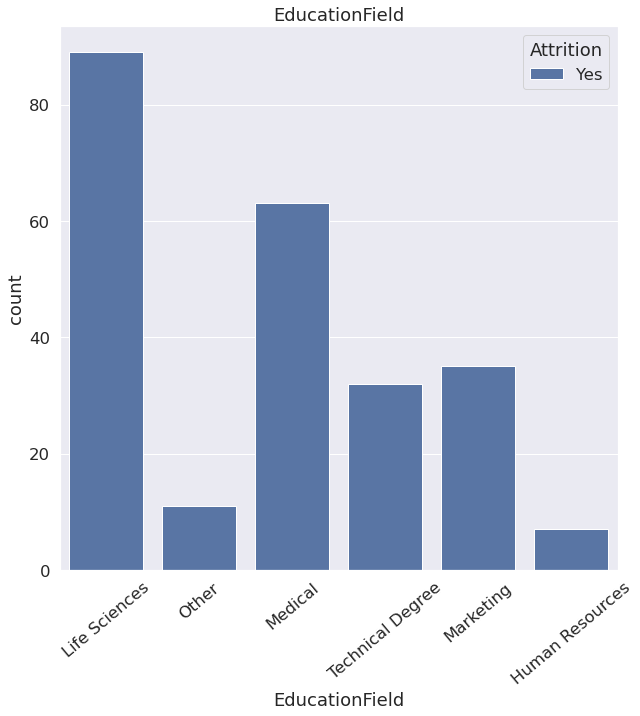

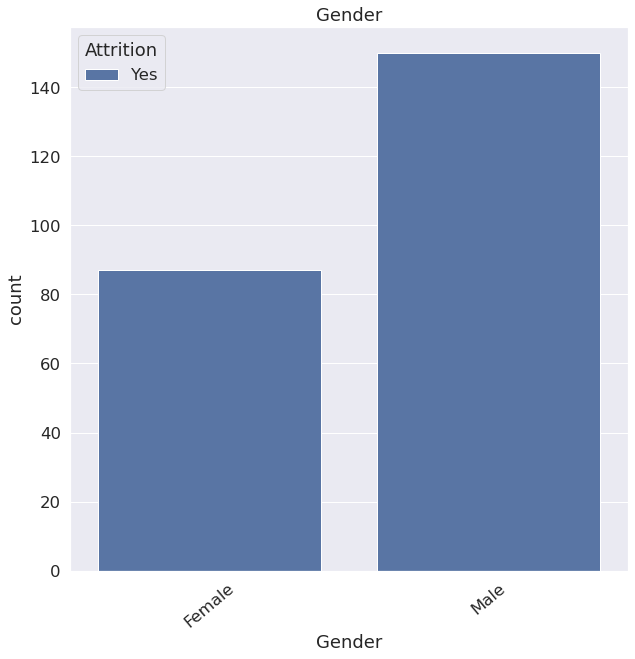

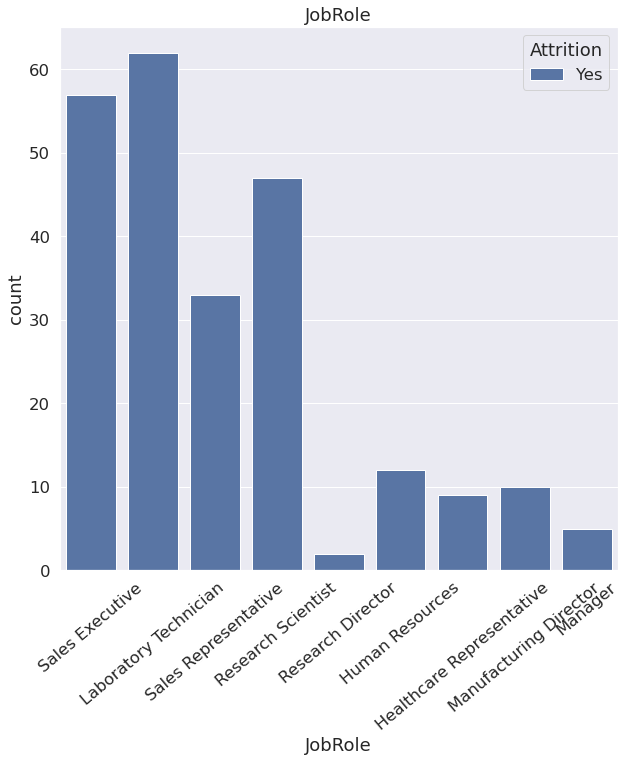

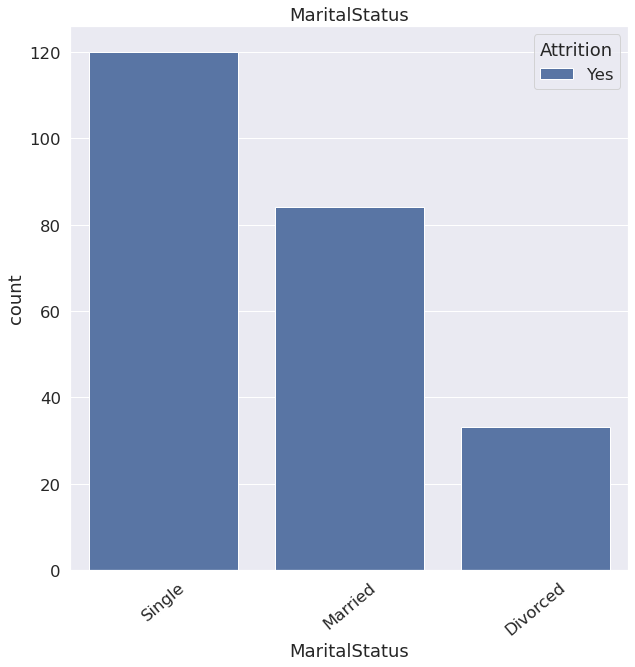

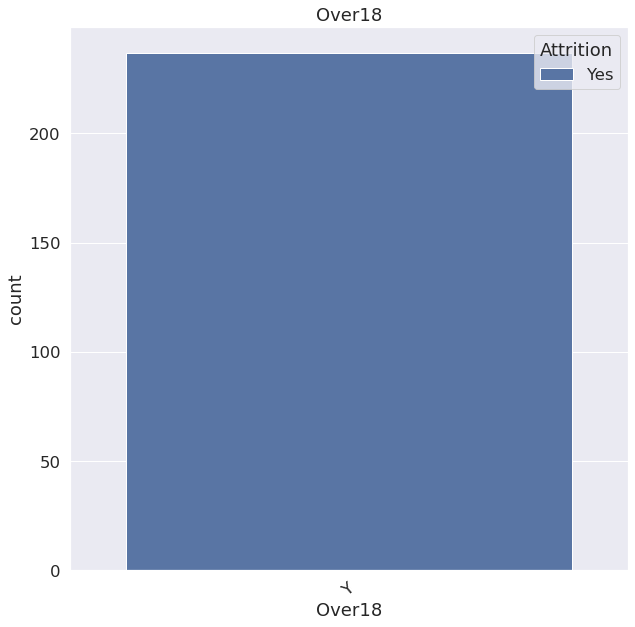

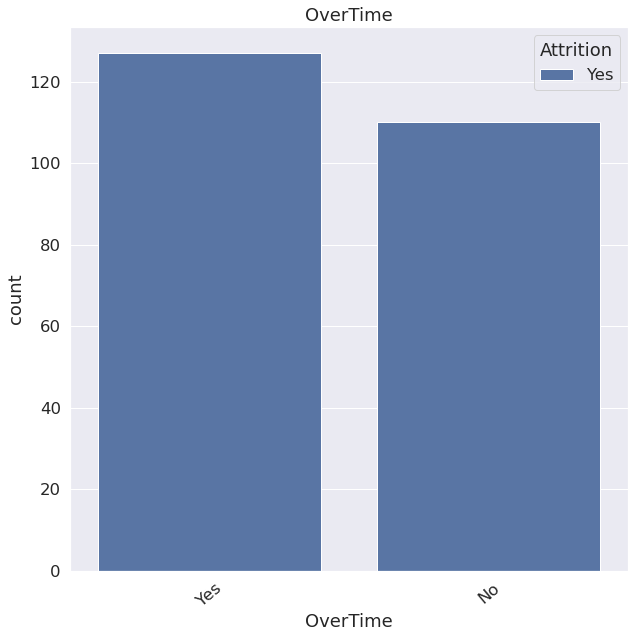

In [28]:
# Visualize the relationship between the target variable and each categorical variable using bar plots
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('white')
sns.set(font_scale=1.5, rc={'font.family': 'Serif fonts'})
for col in dataForAttrition.select_dtypes(include=['object']):
    plt.figure()
    #sns.countplot(x=col, hue='Attrition', data=dataForAttrition)
    plot=sns.countplot(x=col, hue="Attrition", data=dataForAttrition)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=40)
    plt.title(col)

## Correlation Matrix

<AxesSubplot:>

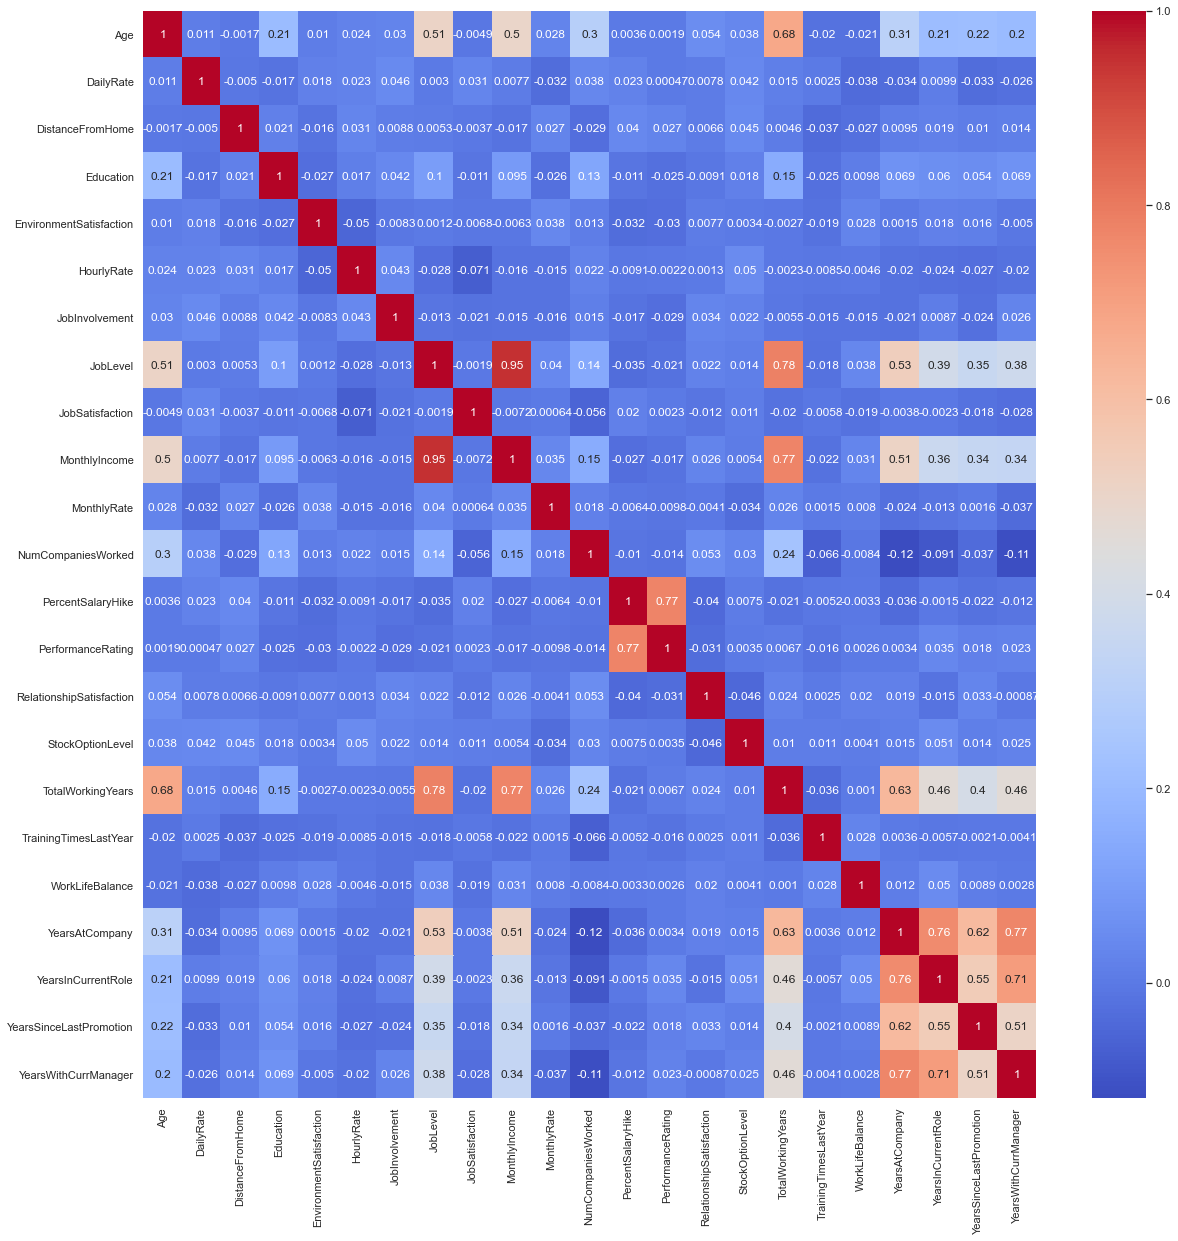

In [29]:
# Visualize the correlation between numerical variables using a heatmap
sns.set(rc={'figure.figsize':(20,20)})

plt.figure()
sns.heatmap(maindata.corr(), annot=True, cmap='coolwarm')
